In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [42]:
data = pd.read_csv(r'C:\Users\sreeh\DSA\Data-sets\titanic_dataset.csv')

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [44]:
data.set_index("PassengerId", inplace = True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [45]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data.shape

(891, 11)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [48]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4. Fill in all the missing values present in all the columns in the dataset

In [49]:
# Filling the Age column with SimpleImputer.
num_col = data[['Age']]
num_col.shape

(891, 1)

In [50]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(num_col)
num_col = imputer.transform(num_col)

In [51]:
type(num_col)

numpy.ndarray

In [52]:
num_col = pd.DataFrame(num_col, index=pd.RangeIndex(start=1,stop = 892), columns = ['Age'])

In [53]:
num_col

,Age
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
...,...
887,27.000000
888,19.000000
889,29.699118
890,26.000000


In [54]:
num_col.isna().sum()

Age    0
dtype: int64

In [55]:
data = data.drop(['Age'], axis= 1)
data = pd.concat([data,num_col],axis=1)
data.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [56]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age           0
dtype: int64

In [57]:
# Filling Cabin and Embarked with Data unavailable.
for i in ['Cabin','Embarked']:
    data[i].fillna('data unavailable',inplace = True)

In [58]:
data.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,data unavailable,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,data unavailable,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,data unavailable,S,35.0


In [59]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Age         0
dtype: int64

Thus all the missing values are filled.

## 5. Check and handle outliers in at least 3 columns in the dataset

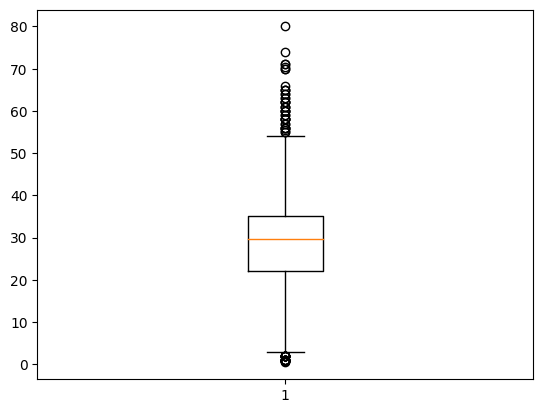

In [60]:
plt.boxplot(data["Age"])
plt.show()

In [61]:
q1 = np.percentile(data['Age'], 25)
q2 = np.percentile(data['Age'], 50)
q3 = np.percentile(data['Age'], 75)
iqr=q3-q1
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [62]:
outlier = []
for x in data['Age']:
    if x> upr_limit or x<low_limit:
        outlier.append(x)

In [63]:
ind1 = data.loc[data['Age'].isin(outlier)].index

In [64]:
data.drop(ind1[:ind1.shape[0]],inplace=True)

In [65]:
data.shape #The outliers for "Age" column have been removed.

(825, 11)

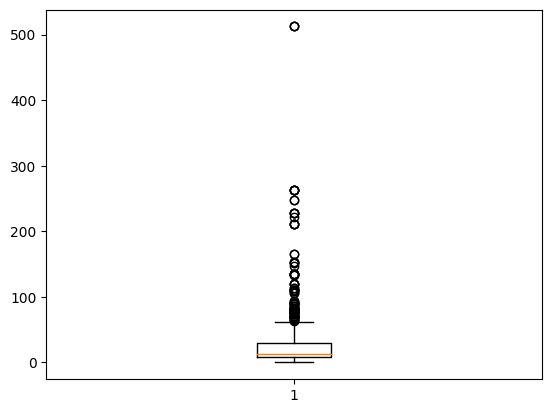

In [66]:
plt.boxplot(data['Fare'])
plt.show()

In [67]:
q1 = np.percentile(data['Fare'], 25)
q2 = np.percentile(data['Fare'], 50)
q3 = np.percentile(data['Fare'], 75)
iqr=q3-q1
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [68]:
outlier = []
for x in data['Fare']:
    if x> upr_limit or x<low_limit:
        outlier.append(x)

In [69]:
ind1 = data.loc[data['Fare'].isin(outlier)].index

In [70]:
data.drop(ind1[:ind1.shape[0]],inplace=True)

In [71]:
data.shape   # The outliers in "Fare" column have been removed.

(718, 11)

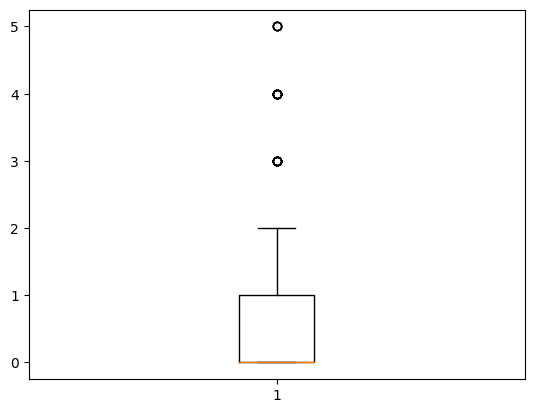

In [72]:
plt.boxplot(data["SibSp"])
plt.show()

In [73]:
q1 = np.percentile(data['SibSp'], 25)
q2 = np.percentile(data['SibSp'], 50)
q3 = np.percentile(data['SibSp'], 75)
iqr=q3-q1
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [74]:
outlier = []
for x in data['SibSp']:
    if x> upr_limit or x<low_limit:
        outlier.append(x)

In [75]:
ind1 = data.loc[data['SibSp'].isin(outlier)].index

In [76]:
data.drop(ind1[:ind1.shape[0]],inplace=True)

In [77]:
data.shape   # The outliers in "SibSp" column have been removed.

(689, 11)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [78]:
data = data.drop(['Name', 'Ticket','Cabin'], axis=1) # Dropping columns with too many unique values or Null values.

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [80]:
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
1,0,3,1,1,0,7.2500,2,22.000000
3,1,3,0,0,0,7.9250,2,26.000000
4,1,1,0,1,0,53.1000,2,35.000000
5,0,3,1,0,0,8.0500,2,35.000000
6,0,3,1,0,0,8.4583,1,29.699118
...,...,...,...,...,...,...,...,...
887,0,2,1,0,0,13.0000,2,27.000000
888,1,1,0,0,0,30.0000,2,19.000000
889,0,3,0,1,2,23.4500,2,29.699118
890,1,1,1,0,0,30.0000,0,26.000000


In [81]:
num_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare","Embarked","Sex"]

In [82]:
X = data[num_cols]
y = data["Survived"].reset_index()

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#fit and transform the numerical features
X_scaled = scaler.fit_transform(X)

#convert the scaled array to a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)

In [84]:
X_scaled

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1.0,0.372549,0.5,0.000000,0.118118,1.0,1.0
1,1.0,0.450980,0.0,0.000000,0.129115,1.0,0.0
2,0.0,0.627451,0.5,0.000000,0.865114,1.0,0.0
3,1.0,0.627451,0.0,0.000000,0.131152,1.0,1.0
4,1.0,0.523512,0.0,0.000000,0.137804,0.5,1.0
...,...,...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798,1.0,1.0
685,0.0,0.313725,0.0,0.000000,0.488765,1.0,0.0
686,1.0,0.523512,0.5,0.333333,0.382051,1.0,0.0
687,0.0,0.450980,0.0,0.000000,0.488765,0.0,1.0


In [85]:
X_final = pd.concat([y,X_scaled], axis=1)

In [86]:
X_final.columns =["Passenger ID","Survived","Pclass", "Age", "SibSp", "Parch", "Fare","Embarked","Sex"]
X_final.set_index("Passenger ID", inplace = True)

In [87]:
X_final

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
Passenger ID,,,,,,,,
1,0,1.0,0.372549,0.5,0.000000,0.118118,1.0,1.0
3,1,1.0,0.450980,0.0,0.000000,0.129115,1.0,0.0
4,1,0.0,0.627451,0.5,0.000000,0.865114,1.0,0.0
5,0,1.0,0.627451,0.0,0.000000,0.131152,1.0,1.0
6,0,1.0,0.523512,0.0,0.000000,0.137804,0.5,1.0
...,...,...,...,...,...,...,...,...
887,0,0.5,0.470588,0.0,0.000000,0.211798,1.0,1.0
888,1,0.0,0.313725,0.0,0.000000,0.488765,1.0,0.0
889,0,1.0,0.523512,0.5,0.333333,0.382051,1.0,0.0
